In [393]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from skimpy import clean_columns
import matplotlib.pyplot as plt

In [394]:
os.chdir("/Users/emanwong/Documents/UMich/wn23/si618/proj/618")

In [395]:
os.listdir('data')

['sales-of-cigarettes-per-adult-per-day.csv',
 'WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx',
 'total-hospital-admissions-in-the-united-states-1946-2019.xlsx',
 '.DS_Store',
 'air_pollution_emissions.csv',
 'alcohol_expenditure_usa_long_term.csv',
 'cancer_death_rates_in_the_US_over_the_long_term.csv']

# Load Data

In [396]:
DATA_DIR = 'data'
def data_path(filename, data_dir = DATA_DIR):
    return f"{data_dir}/{filename}"
air_pollution_filename = "air_pollution_emissions.csv"
alcohol_expenditure_filename = "alcohol_expenditure_usa_long_term.csv"
cancer_death_filename = "cancer_death_rates_in_the_US_over_the_long_term.csv"
hospital_admissions_filename = "total-hospital-admissions-in-the-united-states-1946-2019.xlsx"
demographic_indicators_filename = "WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx"
cigarette_sales_filename = "sales-of-cigarettes-per-adult-per-day.csv"

### Hospital Admissions

In [397]:
# read data
hospital_admissions = pd.read_excel(data_path(hospital_admissions_filename), sheet_name = 1)
# remove junk columns & rows
hospital_admissions = hospital_admissions.drop(columns=['Unnamed: 0'])
hospital_admissions = hospital_admissions.iloc[4:,:]
# rename columns
hospital_admissions.rename(columns={'Unnamed: 1':'year', 'Unnamed: 2':'num_admissions_1000s'}, inplace=True)
# fix type
hospital_admissions['year'] = pd.to_numeric(hospital_admissions['year'])
# set dates
hospital_admissions = hospital_admissions.loc[(hospital_admissions['year'] >= 1950) & (hospital_admissions['year'] <= 2011)]
hospital_admissions.set_index('year', inplace=True)

In [398]:
hospital_admissions.head(10)

,num_admissions_1000s
year,
1950,18483.0
1955,21073.0
1960,25027.0
1965,28812.0
1970,31759.0
1971,32664.0
1972,33265.0
1973,34352.0
1974,35506.0


<AxesSubplot: xlabel='year'>

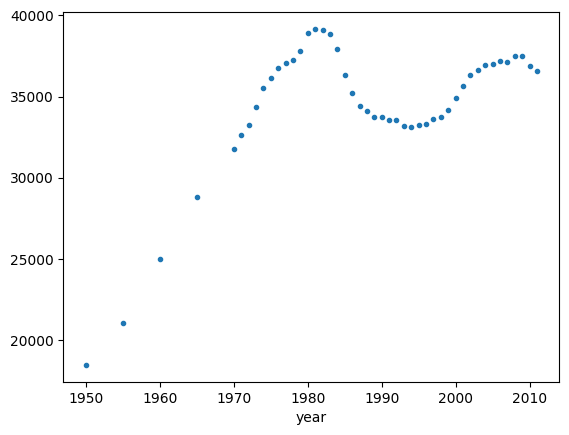

In [399]:
hospital_admissions['num_admissions_1000s'].plot(style='.')

### Demographic Indicators

In [400]:
# read data
demographic_indicators = pd.read_excel(data_path(demographic_indicators_filename), sheet_name=0)
# remove junk rows and set header
demographic_indicators_header = demographic_indicators.iloc[15,:]
demographic_indicators = demographic_indicators.iloc[16:,:]
demographic_indicators.columns = demographic_indicators_header
# select USA data
demographic_indicators = demographic_indicators.loc[demographic_indicators['Region, subregion, country or area *'] == 'United States of America']
# rename columns
demographic_indicators.rename(
    columns={'Year': 'year',
             'Total Population, as of 1 July (thousands)': 'total_population',
             'Male Population, as of 1 July (thousands)': 'male_population',
             'Female Population, as of 1 July (thousands)': 'female_population'},
    inplace=True)
# select relevant columns
demographic_cols = ['year', 'total_population', 'male_population', 'female_population']
demographic_indicators = demographic_indicators[demographic_cols]
# set dates and index
demographic_indicators = demographic_indicators.loc[(demographic_indicators['year'] >= 1950) & (demographic_indicators['year'] <= 2011)]
demographic_indicators.columns.name = None
demographic_indicators.set_index('year', inplace=True)
demographic_indicators

,total_population,male_population,female_population
year,,,
1950,148281.55,73516.095,74765.455
1951,150598.453,74784.499,75813.955
1952,152941.727,76079.283,76862.444
1953,155451.199,77221.443,78229.756
1954,158205.873,78577.893,79627.98
...,...,...,...
2007,302743.399,149147.06,153596.338
2008,305694.91,150592.791,155102.12
2009,308512.035,151968.684,156543.351


### Cancer Death Rates (per 100,000)

In [401]:
# read data
cancer_death = pd.read_csv(data_path(cancer_death_filename))
# set dates
cancer_death = cancer_death.loc[(cancer_death['Year'] >= 1950) & (cancer_death['Year'] <= 2011)]
# basic cleaning
cancer_death = clean_columns(cancer_death)
cancer_death.drop('entity', axis=1, inplace=True)
cancer_death.set_index('year', inplace=True)
cancer_death.head()

16 column names have been cleaned

,stomach_male,colon_and_rectum_male,liver_male,pancreas_male,lung_and_bronchus_male,prostate_male,leukemia_male,stomach_female,colon_and_rectum_female,pancreas_female,lung_and_bronchus_female,breast_female,uterus_female,liver_female
year,,,,,,,,,,,,,,
1950,31.1,33.1,8.6,9.9,24.3,28.9,8.2,17.6,32.3,6.8,5.8,31.9,26.2,9.8
1951,29.7,32.3,8.3,10.3,25.8,28.6,8.7,16.5,31.9,6.7,5.9,31.6,24.5,9.4
1952,28.7,32.8,8.1,10.4,28.0,29.7,8.8,16.1,31.5,7.1,6.1,31.6,23.8,9.5
1953,28.1,33.0,8.0,10.7,30.4,29.8,9.1,15.6,31.4,7.1,6.0,32.2,23.6,9.2
1954,27.3,32.6,7.7,11.2,31.7,30.5,9.4,14.8,31.2,7.3,6.0,31.8,22.5,8.7


### Alcohol Expenditure

In [402]:
alcohol_expenditure = pd.read_csv(data_path(alcohol_expenditure_filename))
# select dates

# clean names
alcohol_expenditure = clean_columns(alcohol_expenditure)

# rename and subset relevant cols
alcohol_expenditure.rename(
    columns={'total_at_home_usda_2018': 'alc_exp_at_home',
             'total_away_from_home': 'alc_exp_away_fr_home',
             'total_alcohol_expenditure_usda_2018': 'alc_exp_total'},
    inplace=True
)
relevant_alc_cols = [
    'year',
    'alc_exp_at_home',
    'alc_exp_away_fr_home',
    'alc_exp_total'
]
alcohol_expenditure = alcohol_expenditure[relevant_alc_cols]
# create lag features
lags = [10, 20, 30]
for col in relevant_alc_cols[1:]:
    for lag in lags:
        lag_col = f"{col}_lag{lag}"
        alcohol_expenditure[lag_col] = alcohol_expenditure[col].shift(lag)
# set index and subset years
alcohol_expenditure = alcohol_expenditure.loc[(alcohol_expenditure['year'] >= 1950) & (alcohol_expenditure['year'] <= 2011)]
alcohol_expenditure.set_index('year', inplace=True)

alcohol_expenditure

11 column names have been cleaned

,alc_exp_at_home,alc_exp_away_fr_home,alc_exp_total,alc_exp_at_home_lag10,alc_exp_at_home_lag20,alc_exp_at_home_lag30,alc_exp_away_fr_home_lag10,alc_exp_away_fr_home_lag20,alc_exp_away_fr_home_lag30,alc_exp_total_lag10,alc_exp_total_lag20,alc_exp_total_lag30
year,,,,,,,,,,,,
1950,3455000000,4413000000,7868000000,9.770000e+08,NaN,NaN,1.602000e+09,NaN,NaN,2.579000e+09,NaN,NaN
1951,3789000000,4765000000,8554000000,1.180000e+09,NaN,NaN,1.914000e+09,NaN,NaN,3.094000e+09,NaN,NaN
1952,3999000000,4899000000,8898000000,1.586000e+09,NaN,NaN,2.368000e+09,NaN,NaN,3.954000e+09,NaN,NaN
1953,4080000000,4960000000,9040000000,1.981000e+09,NaN,NaN,2.998000e+09,NaN,NaN,4.979000e+09,NaN,NaN
1954,4189000000,4946000000,9135000000,2.379000e+09,NaN,NaN,3.432000e+09,NaN,NaN,5.811000e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,69742656717,67992000000,137734656717,4.042086e+10,3.060304e+10,1.823500e+10,4.135400e+10,2.886700e+10,1.496000e+10,8.177486e+10,5.947004e+10,3.319500e+10
2008,79031284048,69884000000,148915284048,4.293135e+10,3.084603e+10,1.961200e+10,4.560300e+10,3.026700e+10,1.666800e+10,8.853435e+10,6.111303e+10,3.628000e+10
2009,78302523841,68655000000,146957523841,4.532177e+10,3.227780e+10,2.191100e+10,5.058000e+10,3.103900e+10,1.889300e+10,9.590177e+10,6.331680e+10,4.080400e+10


### Air Pollution

In [403]:
# read data
air_pollution = pd.read_csv(data_path(air_pollution_filename), low_memory=False)
# select USA data
air_pollution = air_pollution.loc[air_pollution['Entity'] == 'United States']
# fix column dtype
air_pollution['nh3_per_capita'] = pd.to_numeric(air_pollution['nh3_per_capita'])
# clean names and set index
air_pollution = clean_columns(air_pollution)
# subset cols
air_pol_rel_cols = [
    'year',
    'nox_per_capita', 
    'so_2_per_capita', 
    'co_per_capita', 
    'oc_per_capita',
    'nmvoc_per_capita', 
    'bc_per_capita', 
    'nh_3_per_capita'
]
air_pollution = air_pollution[air_pol_rel_cols]
# create lag features
lags = [10, 20, 30]
for col in air_pol_rel_cols[1:]:
    for lag in lags:
        lag_col = f"{col}_lag{lag}"
        air_pollution[lag_col] = air_pollution[col].shift(lag)
# subset dates and set index
air_pollution = air_pollution.loc[(air_pollution['year'] >= 1950) & (air_pollution['year'] <= 2011)]
air_pollution.set_index('year', inplace=True)

air_pollution.head()

6 column names have been cleaned

,nox_per_capita,so_2_per_capita,co_per_capita,oc_per_capita,nmvoc_per_capita,bc_per_capita,nh_3_per_capita,nox_per_capita_lag10,nox_per_capita_lag20,nox_per_capita_lag30,...,oc_per_capita_lag30,nmvoc_per_capita_lag10,nmvoc_per_capita_lag20,nmvoc_per_capita_lag30,bc_per_capita_lag10,bc_per_capita_lag20,bc_per_capita_lag30,nh_3_per_capita_lag10,nh_3_per_capita_lag20,nh_3_per_capita_lag30
year,,,,,,,,,,,,,,,,,,,,,
1950,87.872567,113.791573,660.499190,6.120093,106.463437,3.749932,9.289717,77.165886,65.272762,52.778905,...,13.059638,86.146689,74.035092,65.265225,3.753883,4.608253,6.885877,8.087318,8.094736,7.332490
1951,92.284438,117.679654,681.203964,5.698752,111.268008,3.501867,9.570112,80.869628,58.398253,48.989746,...,11.682725,88.638057,68.036087,62.298414,3.989941,3.881714,5.775849,8.207000,7.935655,7.300943
1952,92.125837,111.202933,680.903893,5.305718,112.090448,3.221975,9.744620,80.073479,52.121063,52.419322,...,11.397630,87.207958,62.230332,65.861795,4.189775,3.257480,5.688874,8.155423,7.742165,7.410596
1953,93.192457,111.909954,690.662295,4.836261,114.208577,2.935008,9.946302,83.634673,56.337560,63.763995,...,12.789408,90.970960,66.689566,76.922275,4.190680,3.378748,7.119476,8.255380,7.776478,7.669434
1954,90.616479,102.869296,674.088049,4.476236,112.303428,2.655331,10.007221,91.135738,57.583666,59.507127,...,11.811036,99.049593,67.118094,72.506306,4.360776,3.473152,6.357700,8.466189,7.721901,7.599375


### Cigarettes Sold Per Adult Per Day

In [404]:
# read data
cigarette_sales = pd.read_csv(data_path(cigarette_sales_filename))
# clean column names and subset data
cigarette_sales = clean_columns(cigarette_sales)
cigarette_sales = cigarette_sales.loc[cigarette_sales['code'] == 'USA']
cigarette_sales.drop(columns=['entity', 'code'], inplace=True)
cigarette_sales.columns = ['year', 'cigarettes_sold_per_adult']
# introduce time lag features
cigarette_sales['cigarettes_sold_per_adult_lag10'] = cigarette_sales['cigarettes_sold_per_adult'].shift(10)
cigarette_sales['cigarettes_sold_per_adult_lag20'] = cigarette_sales['cigarettes_sold_per_adult'].shift(20)
cigarette_sales['cigarettes_sold_per_adult_lag30'] = cigarette_sales['cigarettes_sold_per_adult'].shift(30)
# get relevant dates
cigarette_sales = cigarette_sales.loc[(cigarette_sales['year'] >= 1950) & (cigarette_sales['year'] <= 2011)]
cigarette_sales.set_index('year', inplace=True)

cigarette_sales.head()

4 column names have been cleaned

,cigarettes_sold_per_adult,cigarettes_sold_per_adult_lag10,cigarettes_sold_per_adult_lag20,cigarettes_sold_per_adult_lag30
year,,,,
1950,9.3,6.5,4.3,1.7
1951,9.8,6.8,4.3,1.9
1952,10.0,7.4,4.4,1.9
1953,9.7,7.8,4.8,2.3
1954,9.2,7.0,5.3,2.5


# Data Wrangling

#### Hospital admissions

Between 1950 and 1970, the data is recorded every 5 years. We will have to introduce the missing years into the data and fill in the missing values (using pandas' interpolation).

In [405]:
hospital_admissions = hospital_admissions.reindex(range(1950, 2012))
hospital_admissions.head(7)

,num_admissions_1000s
year,
1950,18483.0
1951,NaN
1952,NaN
1953,NaN
1954,NaN
1955,21073.0
1956,NaN


We try 3 methods of interpolation – linear, quadratic and cubic, and plot their values.

In [406]:
hospital_admissions['linear'] = hospital_admissions.interpolate(method='linear')['num_admissions_1000s']
hospital_admissions['quadratic'] = hospital_admissions.interpolate(method='quadratic')['num_admissions_1000s']
hospital_admissions['cubic'] = hospital_admissions.interpolate(method='cubic')['num_admissions_1000s']

Text(0.5, 1.0, 'Cubic Interpolation')

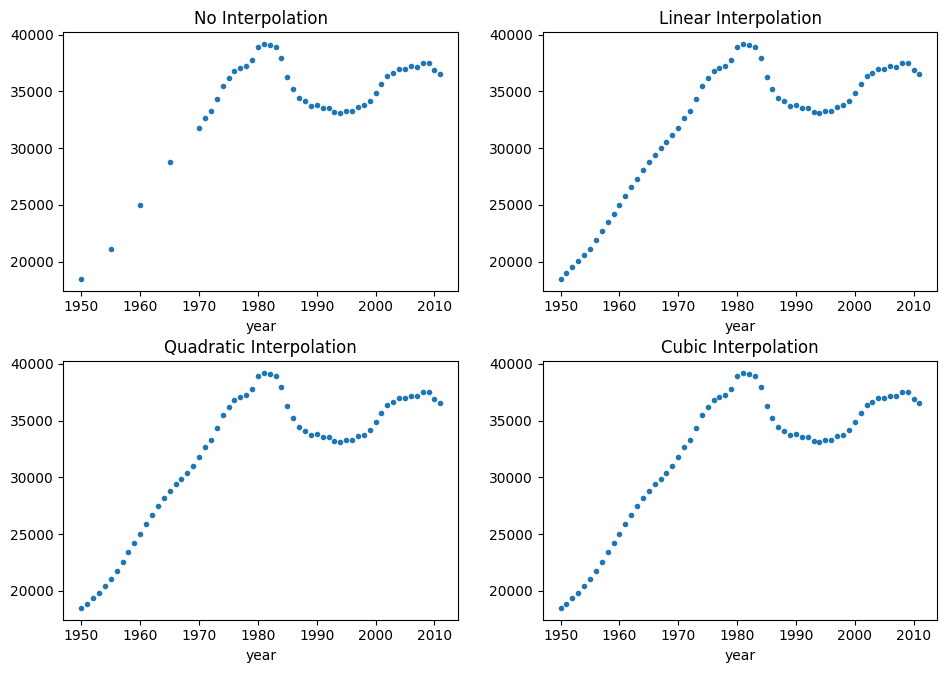

In [407]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout(pad=3.0)
hospital_admissions['num_admissions_1000s'].plot(style='.',ax=axes[0,0])
hospital_admissions['linear'].plot(style='.', ax=axes[0,1])
hospital_admissions['quadratic'].plot(style='.', ax=axes[1,0])
hospital_admissions['quadratic'].plot(style='.', ax=axes[1,1])
axes[0,0].set_title("No Interpolation")
axes[0,1].set_title("Linear Interpolation")
axes[1,0].set_title("Quadratic Interpolation")
axes[1,1].set_title("Cubic Interpolation")

We see that the quadratic interpolation appears to give more realistic looking values when simply comparin their plots. When using cubic interpolation, we see that there does not appear to be any significant difference compared to the quadratic interpolation, and thus we settle on the quadratic interpolation, so as to avoid potential overfitting with a higher order polynomial interoplation.

In [408]:
hospital_admissions.interpolate(method='quadratic', inplace=True)

We are interested in the admissions per capita, and as such, in our pre-processing step we will multiply the `num_admissions_1000s` column by $1000$ in order to achieve the approximate raw number of approximations, which we will later divide by the population.

In [409]:
hospital_admissions['num_admissions_total'] = hospital_admissions['num_admissions_1000s'] * 1000
hospital_admissions.head()

,num_admissions_1000s,linear,quadratic,cubic,num_admissions_total
year,,,,,
1950,18483.000000,18483.0,18483.000000,18483.000000,1.848300e+07
1951,18874.298477,19001.0,18874.298477,18833.634720,1.887430e+07
1952,19328.947715,19519.0,19328.947715,19277.659627,1.932895e+07
1953,19846.947715,20037.0,19846.947715,19805.367173,1.984695e+07
1954,20428.298477,20555.0,20428.298477,20407.049813,2.042830e+07


#### Joining and Further Processing

In [410]:
merged_df = hospital_admissions.copy()
dfs_to_merge = [
    demographic_indicators,
    cancer_death,
    alcohol_expenditure,
    air_pollution,
    cigarette_sales
]

In [411]:
for df in dfs_to_merge:
    merged_df = merged_df.merge(
        df, 
        how='left',
        left_index=True,
        right_index=True,
        suffixes=(None, None)
    )
merged_df.head()

,num_admissions_1000s,linear,quadratic,cubic,num_admissions_total,total_population,male_population,female_population,stomach_male,colon_and_rectum_male,...,bc_per_capita_lag10,bc_per_capita_lag20,bc_per_capita_lag30,nh_3_per_capita_lag10,nh_3_per_capita_lag20,nh_3_per_capita_lag30,cigarettes_sold_per_adult,cigarettes_sold_per_adult_lag10,cigarettes_sold_per_adult_lag20,cigarettes_sold_per_adult_lag30
year,,,,,,,,,,,,,,,,,,,,,
1950,18483.000000,18483.0,18483.000000,18483.000000,1.848300e+07,148281.55,73516.095,74765.455,31.1,33.1,...,3.753883,4.608253,6.885877,8.087318,8.094736,7.332490,9.3,6.5,4.3,1.7
1951,18874.298477,19001.0,18874.298477,18833.634720,1.887430e+07,150598.453,74784.499,75813.955,29.7,32.3,...,3.989941,3.881714,5.775849,8.207000,7.935655,7.300943,9.8,6.8,4.3,1.9
1952,19328.947715,19519.0,19328.947715,19277.659627,1.932895e+07,152941.727,76079.283,76862.444,28.7,32.8,...,4.189775,3.257480,5.688874,8.155423,7.742165,7.410596,10.0,7.4,4.4,1.9
1953,19846.947715,20037.0,19846.947715,19805.367173,1.984695e+07,155451.199,77221.443,78229.756,28.1,33.0,...,4.190680,3.378748,7.119476,8.255380,7.776478,7.669434,9.7,7.8,4.8,2.3
1954,20428.298477,20555.0,20428.298477,20407.049813,2.042830e+07,158205.873,78577.893,79627.98,27.3,32.6,...,4.360776,3.473152,6.357700,8.466189,7.721901,7.599375,9.2,7.0,5.3,2.5


In [412]:
merged_df.columns

Index(['num_admissions_1000s', 'linear', 'quadratic', 'cubic',
       'num_admissions_total', 'total_population', 'male_population',
       'female_population', 'stomach_male', 'colon_and_rectum_male',
       'liver_male', 'pancreas_male', 'lung_and_bronchus_male',
       'prostate_male', 'leukemia_male', 'stomach_female',
       'colon_and_rectum_female', 'pancreas_female',
       'lung_and_bronchus_female', 'breast_female', 'uterus_female',
       'liver_female', 'alc_exp_at_home', 'alc_exp_away_fr_home',
       'alc_exp_total', 'alc_exp_at_home_lag10', 'alc_exp_at_home_lag20',
       'alc_exp_at_home_lag30', 'alc_exp_away_fr_home_lag10',
       'alc_exp_away_fr_home_lag20', 'alc_exp_away_fr_home_lag30',
       'alc_exp_total_lag10', 'alc_exp_total_lag20', 'alc_exp_total_lag30',
       'nox_per_capita', 'so_2_per_capita', 'co_per_capita', 'oc_per_capita',
       'nmvoc_per_capita', 'bc_per_capita', 'nh_3_per_capita',
       'nox_per_capita_lag10', 'nox_per_capita_lag20', 'nox_per_cap

In [413]:
df = merged_df.copy()

We have all the data joined and will perform the following processing:
1. Get the hospital admissions per capita
2. Get the complete death rate for each cancer type (remove separation by gender)
3. Get the complete death rate from all types of cancer
4. Get the alcohol expenditure values per capita

In [414]:
# get hospital admissions per capita
df['admissions_per_capita'] = df['num_admissions_total'] / df['total_population']

In [415]:
def cancer_deaths_helper(df, cancer_type):
    n_indiv = 100_000
    male_col = f"{cancer_type}_male"
    female_col = f"{cancer_type}_female"
    try:
        male_deaths = (df[male_col] / n_indiv) * df['male_population']
    except Exception as e:
        male_deaths = 0
    try:
        female_deaths = (df[female_col] / n_indiv) * df['female_population']
    except Exception as e:
        female_deaths = 0
    deaths = male_deaths + female_deaths
    total_rate = deaths / df['total_population']
    return total_rate

In [416]:
# get death rate per cancer type
cancer_types = ['stomach', 'colon_and_rectum', 'liver', 'pancreas', 'lung_and_bronchus',
                'prostate', 'leukemia', 'breast', 'uterus']

for cancer_type in cancer_types:
    df[cancer_type] = cancer_deaths_helper(df, cancer_type)


In [417]:
# get cancer death rates total
df['all_cancer'] = 0
for cancer_type in cancer_types:
    df['all_cancer'] += df[cancer_type]

In [419]:
# get alcohol expenditure per capita
alc_cols = [
    'alc_exp_at_home', 'alc_exp_away_fr_home',
    'alc_exp_total', 'alc_exp_at_home_lag10', 'alc_exp_at_home_lag20',
    'alc_exp_at_home_lag30', 'alc_exp_away_fr_home_lag10',
    'alc_exp_away_fr_home_lag20', 'alc_exp_away_fr_home_lag30',
    'alc_exp_total_lag10', 'alc_exp_total_lag20', 'alc_exp_total_lag30',
]
for col in alc_cols:
    colname = f"{col}_pc"
    df[colname] = df[col] / df['total_population']


In [421]:
columns_of_interest = [
    'stomach_male', 'colon_and_rectum_male', 'liver_male', 
    'pancreas_male', 'lung_and_bronchus_male', 'prostate_male', 
    'leukemia_male', 'stomach_female', 'colon_and_rectum_female',
    'pancreas_female', 'lung_and_bronchus_female', 'breast_female', 
    'uterus_female', 'liver_female', 
    'nox_per_capita', 'so_2_per_capita', 'co_per_capita', 'oc_per_capita',
    'nmvoc_per_capita', 'bc_per_capita', 'nh_3_per_capita',
    'nox_per_capita_lag10', 'nox_per_capita_lag20', 'nox_per_capita_lag30',
    'so_2_per_capita_lag10', 'so_2_per_capita_lag20',
    'so_2_per_capita_lag30', 'co_per_capita_lag10', 'co_per_capita_lag20',
    'co_per_capita_lag30', 'oc_per_capita_lag10', 'oc_per_capita_lag20',
    'oc_per_capita_lag30', 'nmvoc_per_capita_lag10',
    'nmvoc_per_capita_lag20', 'nmvoc_per_capita_lag30',
    'bc_per_capita_lag10', 'bc_per_capita_lag20', 'bc_per_capita_lag30',
    'nh_3_per_capita_lag10', 'nh_3_per_capita_lag20',
    'nh_3_per_capita_lag30', 'cigarettes_sold_per_adult',
    'cigarettes_sold_per_adult_lag10', 'cigarettes_sold_per_adult_lag20',
    'cigarettes_sold_per_adult_lag30', 'admissions_per_capita', 'stomach',
    'colon_and_rectum', 'liver', 'pancreas', 'lung_and_bronchus',
    'prostate', 'leukemia', 'breast', 'uterus', 'all_cancer',
    'alc_exp_at_home_pc', 'alc_exp_away_fr_home_pc', 'alc_exp_total_pc',
    'alc_exp_at_home_lag10_pc', 'alc_exp_at_home_lag20_pc',
    'alc_exp_at_home_lag30_pc', 'alc_exp_away_fr_home_lag10_pc',
    'alc_exp_away_fr_home_lag20_pc', 'alc_exp_away_fr_home_lag30_pc',
    'alc_exp_total_lag10_pc', 'alc_exp_total_lag20_pc',
    'alc_exp_total_lag30_pc'
]
df_clean = df[columns_of_interest]

In [422]:
df_clean.head()

,stomach_male,colon_and_rectum_male,liver_male,pancreas_male,lung_and_bronchus_male,prostate_male,leukemia_male,stomach_female,colon_and_rectum_female,pancreas_female,...,alc_exp_total_pc,alc_exp_at_home_lag10_pc,alc_exp_at_home_lag20_pc,alc_exp_at_home_lag30_pc,alc_exp_away_fr_home_lag10_pc,alc_exp_away_fr_home_lag20_pc,alc_exp_away_fr_home_lag30_pc,alc_exp_total_lag10_pc,alc_exp_total_lag20_pc,alc_exp_total_lag30_pc
year,,,,,,,,,,,,,,,,,,,,,
1950,31.1,33.1,8.6,9.9,24.3,28.9,8.2,17.6,32.3,6.8,...,53061.220361,6588.817017,NaN,NaN,10803.771609,NaN,NaN,17392.588626,NaN,NaN
1951,29.7,32.3,8.3,10.3,25.8,28.6,8.7,16.5,31.9,6.7,...,56800.052256,7835.405852,NaN,NaN,12709.2939,NaN,NaN,20544.699752,NaN,NaN
1952,28.7,32.8,8.1,10.4,28.0,29.7,8.8,16.1,31.5,7.1,...,58179.021347,10369.962672,NaN,NaN,15483.02119,NaN,NaN,25852.983862,NaN,NaN
1953,28.1,33.0,8.0,10.7,30.4,29.8,9.1,15.6,31.4,7.1,...,58153.298644,12743.549183,NaN,NaN,19285.79528,NaN,NaN,32029.344463,NaN,NaN
1954,27.3,32.6,7.7,11.2,31.7,30.5,9.4,14.8,31.2,7.3,...,57741.219253,15037.368429,NaN,NaN,21693.252816,NaN,NaN,36730.621246,NaN,NaN


`N.B. I'm leavin the male and female cancer stuff there in case we want to do some EDA split by gender`

In [424]:
df_clean = df_clean.astype(np.float64)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1950 to 2011
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   stomach_male                     62 non-null     float64
 1   colon_and_rectum_male            62 non-null     float64
 2   liver_male                       62 non-null     float64
 3   pancreas_male                    62 non-null     float64
 4   lung_and_bronchus_male           62 non-null     float64
 5   prostate_male                    62 non-null     float64
 6   leukemia_male                    62 non-null     float64
 7   stomach_female                   62 non-null     float64
 8   colon_and_rectum_female          62 non-null     float64
 9   pancreas_female                  62 non-null     float64
 10  lung_and_bronchus_female         62 non-null     float64
 11  breast_female                    62 non-null     float64
 12  uterus_female      

# EDA

<AxesSubplot: >

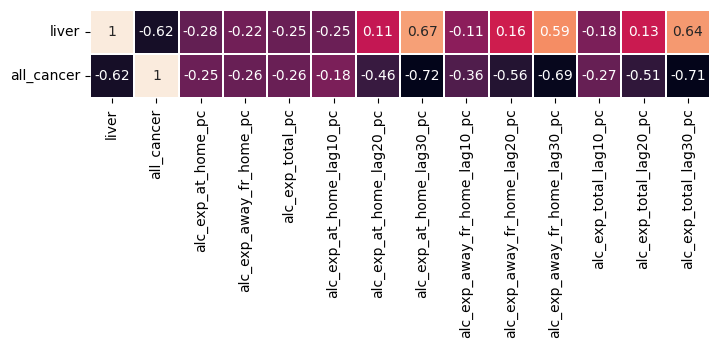

In [428]:
s1_cols = [
    'liver', 'all_cancer', 
    'alc_exp_at_home_pc', 'alc_exp_away_fr_home_pc', 'alc_exp_total_pc',
       'alc_exp_at_home_lag10_pc', 'alc_exp_at_home_lag20_pc',
       'alc_exp_at_home_lag30_pc', 'alc_exp_away_fr_home_lag10_pc',
       'alc_exp_away_fr_home_lag20_pc', 'alc_exp_away_fr_home_lag30_pc',
       'alc_exp_total_lag10_pc', 'alc_exp_total_lag20_pc',
       'alc_exp_total_lag30_pc']
df_s1 = df_clean[s1_cols]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_s1.corr(numeric_only=True).iloc[:2,], 
    cbar=False,
    xticklabels=True, 
    yticklabels=True, 
    linewidths=0.1, 
    annot=True, 
    annot_kws={"fontsize":10},
    ax=ax, 
    square=True)

<AxesSubplot: >

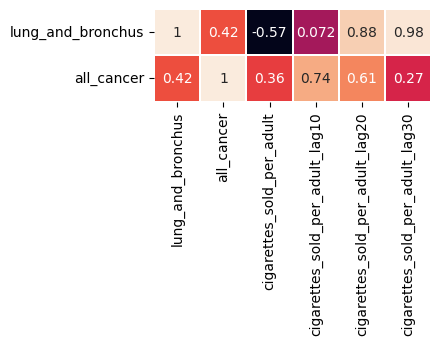

In [429]:
s1_cols = ['lung_and_bronchus', 'all_cancer', 'cigarettes_sold_per_adult', 
           'cigarettes_sold_per_adult_lag10', 'cigarettes_sold_per_adult_lag20', 'cigarettes_sold_per_adult_lag30']
df_s1 = df_clean[s1_cols]

fig, ax = plt.subplots(figsize=(5,1.2))
sns.heatmap(df_s1.corr(numeric_only=True).iloc[:2,], 
    cbar=False,
    xticklabels=True, 
    yticklabels=True, 
    linewidths=0.1, 
    annot=True, 
    annot_kws={"fontsize":10},
    ax=ax, 
    square=True)

<AxesSubplot: >

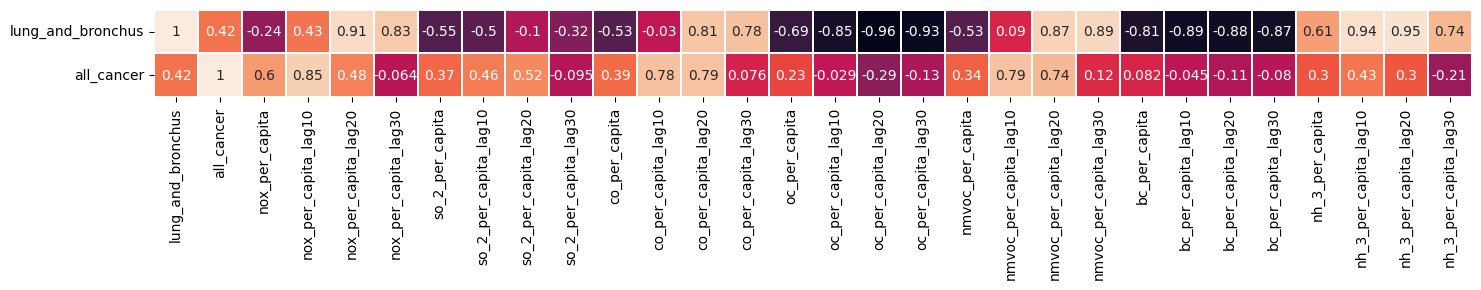

In [433]:
s2_cols = ['lung_and_bronchus', 'all_cancer', 
           'nox_per_capita', 'nox_per_capita_lag10', 'nox_per_capita_lag20', 'nox_per_capita_lag30',
           'so_2_per_capita', 'so_2_per_capita_lag10', 'so_2_per_capita_lag20', 'so_2_per_capita_lag30',
           'co_per_capita', 'co_per_capita_lag10', 'co_per_capita_lag20', 'co_per_capita_lag30',
           'oc_per_capita', 'oc_per_capita_lag10', 'oc_per_capita_lag20', 'oc_per_capita_lag30',
           'nmvoc_per_capita', 'nmvoc_per_capita_lag10', 'nmvoc_per_capita_lag20', 'nmvoc_per_capita_lag30',
           'bc_per_capita', 'bc_per_capita_lag10', 'bc_per_capita_lag20', 'bc_per_capita_lag30',
           'nh_3_per_capita', 'nh_3_per_capita_lag10', 'nh_3_per_capita_lag20', 'nh_3_per_capita_lag30']
df_s2 = df_clean[s2_cols]
fig, ax = plt.subplots(figsize=(17,2))
sns.heatmap(df_s2.corr(numeric_only=True).iloc[:2,], 
    cbar=False,
    xticklabels=True, 
    yticklabels=True, 
    linewidths=0.1, 
    annot=True, 
    annot_kws={"fontsize":10},
    ax=ax, 
    square=True)

# Analysis/Modelling


In [436]:
lm_cols = [
    'all_cancer',
    'cigarettes_sold_per_adult', 'alc_exp_at_home_pc', 
    'alc_exp_away_fr_home_pc', 'alc_exp_total_pc',
    'alc_exp_at_home_lag10_pc', 'alc_exp_at_home_lag20_pc',
    'alc_exp_at_home_lag30_pc', 'alc_exp_away_fr_home_lag10_pc',
    'alc_exp_away_fr_home_lag20_pc', 'alc_exp_away_fr_home_lag30_pc',
    'alc_exp_total_lag10_pc', 'alc_exp_total_lag20_pc',
    'alc_exp_total_lag30_pc',
    'cigarettes_sold_per_adult_lag10', 'cigarettes_sold_per_adult_lag20',
    'cigarettes_sold_per_adult_lag30', 'nh_3_per_capita_lag30',
    'nox_per_capita_lag10', 'nox_per_capita_lag20', 'nox_per_capita_lag30',
    'so_2_per_capita_lag10', 'so_2_per_capita_lag20',
    'so_2_per_capita_lag30', 'co_per_capita_lag10', 'co_per_capita_lag20',
    'co_per_capita_lag30', 'oc_per_capita_lag10', 'oc_per_capita_lag20',
    'oc_per_capita_lag30', 'nmvoc_per_capita_lag10',
    'nmvoc_per_capita_lag20', 'nmvoc_per_capita_lag30',
    'bc_per_capita_lag10', 'bc_per_capita_lag20', 'bc_per_capita_lag30',
    'nh_3_per_capita_lag10', 'nh_3_per_capita_lag20', 'admissions_per_capita'
]
df_lm = df_clean[lm_cols]


<AxesSubplot: >

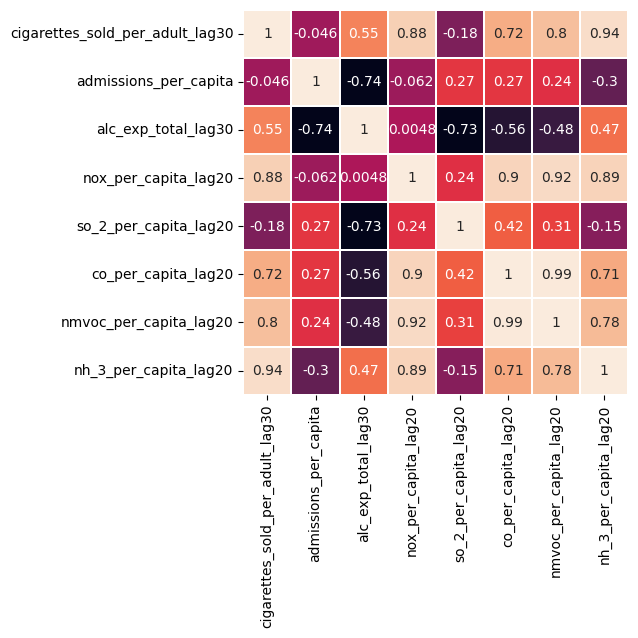

In [337]:
predictor_cols = [
    'cigarettes_sold_per_adult_lag30', 'admissions_per_capita',
    'alc_exp_total_lag30', 'nox_per_capita_lag20', 
    'so_2_per_capita_lag20', 'co_per_capita_lag20',
    'nmvoc_per_capita_lag20', 'nh_3_per_capita_lag20'
]
df_a = df_lm[predictor_cols]

fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df_a.corr(),
    cbar=False,
    xticklabels=True, 
    yticklabels=True, 
    linewidths=0.1, 
    annot=True, 
    annot_kws={"fontsize":10},
    ax=ax, 
    square=True)

In [446]:
model = ols(
    """
    all_cancer ~ cigarettes_sold_per_adult_lag30 + admissions_per_capita + 
        alc_exp_total_lag30_pc + so_2_per_capita_lag20
    """, 
    data=df_lm).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             all_cancer   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           5.61e-26
Time:                        19:03:45   Log-Likelihood:                 428.81
No. Observations:                  47   AIC:                            -847.6
Df Residuals:                      42   BIC:                            -838.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 